<a href="https://colab.research.google.com/github/Rougephoenix/AI_stuff/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets,models,transforms
import numpy as np
import os

In [ ]:
data_transforms = {
    'train' : transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
    ),

    'val' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
    )
}

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/datasets

Mounted at /gdrive
/gdrive/MyDrive/datasets


In [ ]:
%cd /gdrive/MyDrive/datasets

/gdrive/MyDrive/datasets


In [ ]:
data_dir = 'hymenoptera_data'
#Create a dictionary that contains the information of the images in both the training and validation set
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'val']}

In [ ]:
#Create a dictionary that contians the data loader
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=4,
                                              shuffle=True) for x in ['train', 'val']}

#Create a dictionary that contains the size of each dataset (training and validation)
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
#Get the class names
class_names = image_datasets['train'].classes
#Print out the results
print("Class Names: {}".format(class_names))
print("There are {} batches in the training set".format(len(dataloaders['train'])))
print("There are {} batches in the test set".format(len(dataloaders['val'])))
print("There are {} training images".format(dataset_sizes['train']))
print("There are {} testing images".format(dataset_sizes['val']))


Class Names: ['ants', 'bees']
There are 61 batches in the training set
There are 34 batches in the test set
There are 244 training images
There are 136 testing images


In [ ]:
#Loading the Model
model = torchvision.models.resnet18(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 398MB/s]


In [ ]:
for param in model.parameters():
  param.requires_grad = False

In [ ]:
num_features = model.fc.in_features

model.fc = nn.Linear(num_features,2)

In [ ]:
if torch.cuda.is_available():
    model = model.cuda()

In [ ]:
iteration = 0
correct = 0
for inputs,labels in dataloaders['train']:
  if iteration == 1:
    break
  if torch.cuda.is_available():
    inputs = inputs.cuda()
    labels = labels.cuda()
  print("For one iteration, this is what happens:")
  print("Input Shape:",inputs.shape)
  print("Labels Shape:",labels.shape)
  print("Labels are: {}".format(labels))
  output = model(inputs)
  print("Output Tensor:", output)
  print("Outputs Shape",output.shape)
  _, predicted = torch.max(output, 1)
  print("Predicted:", predicted)
  print("Predicted Shape",predicted.shape)
  correct += (predicted == labels).sum().item()
  print("Correct Predictions:",correct)

  iteration += 1



For one iteration, this is what happens:
Input Shape: torch.Size([4, 3, 224, 224])
Labels Shape: torch.Size([4])
Labels are: tensor([0, 0, 0, 1], device='cuda:0')
Output Tensor: tensor([[-0.5297, -0.1433],
        [-1.0557, -1.3121],
        [ 0.0781, -0.7381],
        [-0.5821, -0.5991]], device='cuda:0', grad_fn=<AddmmBackward0>)
Outputs Shape torch.Size([4, 2])
Predicted: tensor([1, 0, 0, 0], device='cuda:0')
Predicted Shape torch.Size([4])
Correct Predictions: 2


In [ ]:
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimiser,step_size = 7,gamma = 0.1)

In [ ]:
model.train()
epochs = 25

for epoch in range(epochs):
  scheduler.step()
  correct = 0

  for inputs,labels in dataloaders['train']:
    if torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    _,predicted = torch.max(outputs,1)
    correct += (predicted == labels).sum().item()
  print("Training {}/{} : Accuracy = {}".format(epoch,epochs,correct/dataset_sizes['train']))



Training 0/25 : Accuracy = 0.7172131147540983
Training 1/25 : Accuracy = 0.7295081967213115
Training 2/25 : Accuracy = 0.7950819672131147
Training 3/25 : Accuracy = 0.7909836065573771
Training 4/25 : Accuracy = 0.7909836065573771
Training 5/25 : Accuracy = 0.8155737704918032
Training 6/25 : Accuracy = 0.8647540983606558
Training 7/25 : Accuracy = 0.7827868852459017
Training 8/25 : Accuracy = 0.819672131147541
Training 9/25 : Accuracy = 0.8073770491803278
Training 10/25 : Accuracy = 0.8360655737704918
Training 11/25 : Accuracy = 0.8524590163934426
Training 12/25 : Accuracy = 0.8647540983606558
Training 13/25 : Accuracy = 0.8565573770491803
Training 14/25 : Accuracy = 0.8524590163934426
Training 15/25 : Accuracy = 0.8483606557377049
Training 16/25 : Accuracy = 0.860655737704918
Training 17/25 : Accuracy = 0.8729508196721312
Training 18/25 : Accuracy = 0.8647540983606558
Training 19/25 : Accuracy = 0.8073770491803278
Training 20/25 : Accuracy = 0.819672131147541
Training 21/25 : Accuracy 

In [ ]:
model.eval()
with torch.no_grad():
  correct = 0

  for inputs,labels in dataloaders['val']:
    if torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()
    outputs = model(inputs)

    _,predicted = torch.max(outputs,1)
    correct += (predicted == labels).sum().item()

print("The test accuracy is {}".format(correct/dataset_sizes['val']*100))



The test accuracy is 97.05882352941177


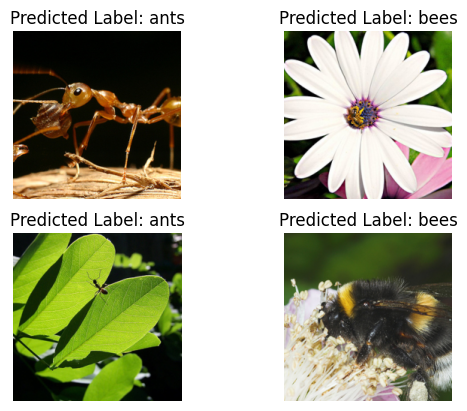

In [ ]:
#Visualize some predictions
import matplotlib.pyplot as plt
fig = plt.figure()
shown_batch = 0
index = 0
with torch.no_grad():
    for (images, labels) in dataloaders['val']:
        if shown_batch == 1:
            break
        shown_batch += 1
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        outputs = model(images)                            #The output is of shape (4,2)
        _, preds = torch.max(outputs, 1)                        #The pred is of shape (4) --> [ 0,  0,  0,  1]

        for i in range(4):
            index += 1
            ax = plt.subplot(2,2,index)
            ax.axis('off')
            ax.set_title('Predicted Label: {}'.format(class_names[preds[i]]))
            input_img = images.cpu().data[i]                    #Get the tensor of the image, and put it to cpu
            inp = input_img.numpy().transpose((1, 2, 0))        #If we have a tensor of shape (2,3,4) --> it becomes (3,4,2)
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            inp = std * inp + mean
            inp = np.clip(inp, 0, 1)
            plt.imshow(inp)